# Analítica y Ciencia de Datos

## CIDE - Otoño 2015

### Modelos de Clusterización y Segmentación

# Referencias

* [ISL, Capítulo 10](http://www-bcf.usc.edu/~gareth/ISL/).


* [ESL, Capítulo 14](http://statweb.stanford.edu/~tibs/ElemStatLearn.1stEd/)


* [Market Segmentation: Conceptual and Methodological Foundations (International Series in Quantitative Marketing](http://www.amazon.com/Market-Segmentation-Methodological-International-Quantitative/dp/0792386353/ref=sr_1_4?ie=UTF8&qid=1447701533&sr=8-4&keywords=market+segmentation)

# Aprendizaje no supervizado


* Hasta el momento todos los modelos que hemos utilizado han sido de aprendizaje *supervizado*:

    * Utilizamos $X$ y $y$ para aprender la función de generación de datos 
    
$$
y = f(X)
$$


* Es supervizado porque utilizamos el poder predictivo de un modelo para aprender la función $f(X)$.


* En esta última parte del curso vamos a ver métodos de aprendizaje **no supervizado**.


* El objetivo es *descubrir* patrones sistemáticos internos en la estructura de las variables $X$, que nos permitan entender mejor a la población en estudio.

# Ejemplos de aplicaciones en el mundo de los negocios



* El área de mayor aplicación de métodos no supervizados en el mundo de los negocios es el de **segmentación**.


* Por ejemplo, en analítica de **conocimiento del cliente o customer relationship managment (CRM)**:


* El objetivo es generar valor al cliente mediante una oferta que se ajuste a sus necesidades.


* Hay un trade-off fundamental:

    * Las ofertas personalizadas se ajustan a cada cliente (i.e. le genera más valor), pero para la firma es difícil, si no imposible, capitalizar economías de escala.
    

* Una alternativa es dividir a los clientes en grupos más o menos homogéneos entre sí, pero heterogéneos entre grupos.


* Esto es una **segmentación**.

# Para qué hacer una segmentación


* Antes de empezar a hacer una segmentación es fundamental responder esta pregunta:

> ¿Para qué?  


* Por ejemplo, *Google* puede querer segmentar a sus usuarios utilizando sus patrones de búsqueda para hacer *marketing dirigido*.


* *American Express* segmenta a sus clientes de tarjeta de crédito utilizando sus patrones de gasto: dónde utilizan sus tarjetas, por qué valores, en qué categorías (libros, electrónicos, supermercados, etc.)?
    
    * Esta segmentación les permiten hacer ofertas con descuentos a distintos grupos de clientes.

# Primer Método: Componentes Principales


* Cuando vimos [Modelos Lineales](7_ModelosLineales.ipynb), introdujimos el método de componentes principales o PCA.


* Mostramos que cada componente principal es una *combinación lineal* de las variables $x$ de tal forma que se maximiza la varianza explicada del conjunto.


* Así, el k-ésimo componente principal para la observación $i$ es
$$
z_{ik} = \sum_{j}x_{ij} \alpha_{jk}
$$

* Los parámetros $\alpha_{jk}$ se conocen como las *cargas factoriales* (loadings), y corresponde al elemento j-ésimo del *vector propio* asociado al k-ésimo valor propio $\lambda_1 > \lambda_2 > \cdots > \lambda_P$.

# Resumen del procedimiento:

* Paso 1. Estandarizar la matriz $X$.

* Paso 2. Obtener los vectores propios $V_k$ de $X'X$, $k \in  \{1,2,\cdots, p\}$, con la convención que  $\lambda_1> \lambda_2 > \cdots > \lambda_p$:


* Paso 3.  Construir los correspondientes componentes principales
$$
Z_k = XV_k
$$


* Paso 4.  Interpretar

# Cómo se interpretan los componentes principales


* Cada componente principal es una combinación lineal de las variables $x_p$, $p =1, 2, \cdots, P$.


* Así, coeficientes $\alpha_{jk}$ más grandes (pequeños) le dan más o menos peso a cada variable.


* Para interpretar los coeficientes es útil analizar las cargas correspondientes.


* Más abajo veremos un ejemplo.

# Por qué se estandariza la matriz X?


* Es necesario no sólo centrar sino también estandarizar la matrix $X$.


* Así, las cargas no dependen de las unidades de medición de cada variable.


* Por ejemplo, si una de las variables es el ingreso, este puede medirse en pesos, cientos de pesos, miles de pesos, etc.


* Los componentes principales son sensibles a la escala de cada variable: buscamos obtener la combinación lineal que maximiza la varianza explicada.

# Ejemplo: Pruebas psicométricas de la fuerza de ventas de una empresa


* Los siguientes datos incluyen los resultados psicométricos de una muestra aleatoria de la fuerza de ventas de una empresa.


* En total hay 91 resultados psicométricos.


* Como varias de pruebas variables están altamente correlacionadas, tiene sentido utilizar PCA para hacer una reducción de dimensionalidad y buscar encontrar patrones sistemáticos y estructuras latentes.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir(os.getcwd())

import sys 
sys.path.append('//Users//danielvaughan//Documents//Python Scripts')

data_dem = pd.read_excel('datasets//psico_demo_clean.xlsx')
data_psy = pd.read_excel('datasets/psicometricos_clean.xlsx')
data_ven = pd.read_excel('datasets//psico_sales_clean.xlsx')

# eliminemos aquellas variables que tienen más de 30% de Missing Values


In [ ]:
# Seleccionemos unas variables que nos interesen:
data_dem.keys()

In [9]:
np.array(data_psy.keys())

array([u'CI', u'INSIGHT_SERVICIO', u'INSIGHT_LIDERAZGO',
       u'INSIGHT_ENFOQUE_Resultados', u'INSIGHT_TRABAJO_Equipo',
       u'INSIGHT_INNOVACION', u'INSIGHT_CONTROL', u'Veracidad', u'intRobo',
       u'intNormas', u'intSoborno', u'intCompromisoOrganizacional',
       u'intConcienciaSeguridad', u'Terman___Capacidad_Intelectual',
       u'Tmn___Informacion', u'Tmn___Juicio', u'Tmn___Vocabulario',
       u'Tmn___Sinstesis', u'Tmn___Concentracion', u'Tmn___Analsis',
       u'Tmn___Abstraccion', u'Tmn___Planeacion', u'Tmn___Organizacion',
       u'Tmn___Atencion', u'Tmn___Eficiencia_(Valor)',
       u'Tmn___C.I_(Valor)', u'Gordon___Iniciativa', u'Gdn___Ascendencia',
       u'Gdn___Perseverancia', u'Gdn___Est._Emocional',
       u'Gdn___Sociabilidad', u'Gdn___Cautela', u'Gdn___Originalidad',
       u'Gdn___Rel._Personales', u'Gdn___Vigor', u'Cleaver___(T)_Empuje',
       u'Cle___(T)_Influencia', u'Cle___(T)_Estabilidad',
       u'Cle___(T)_Apego_a_normas', u'Cle___(L)_Empuje',
       u'

In [10]:
data_ven.keys()

Index([ u'prod_0',  u'prod_1',  u'prod_2',  u'prod_3',  u'prod_4',  u'prod_5',
        u'prod_6',  u'prod_7',  u'prod_8',  u'prod_9', u'prod_10', u'prod_11'],
      dtype='object')

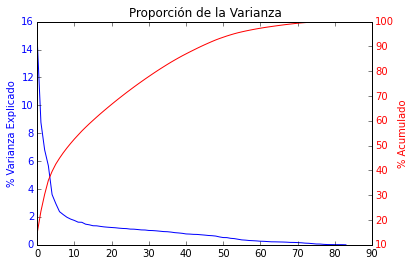

In [12]:
# empecemos por estandarizar la matriz
xmat = data_psy.copy()
xmat_dem = (xmat - xmat.mean())/xmat.std()
# Estamos listos para estimar PCA:
Smat = np.dot(xmat_dem.T,xmat_dem)
D, V = np.linalg.eig(Smat)
# Organicémoslos de menor a mayor: NO SIEMPRE LO ESTAN
D = pd.DataFrame(D, columns=['valores_ppios']).sort(columns='valores_ppios', ascending=False)
ind_sorted = D.index
# Componentes principales: con los valores propios ordenados de mayor a menor
Zmat = np.dot(xmat_dem,V[:,ind_sorted])
# Veamos la proporción de las varianzas explicadas por todos
fig, ax1 = plt.subplots()
t = np.arange(D.shape[0])
ax1.plot(np.arange(D.shape[0]), (100*D/D.sum()).values, 'b')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('% Varianza Explicado', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
# Ahora la varianza acumulada
ax2 = ax1.twinx()
ax2.plot(np.arange(D.shape[0]), (100*D/D.sum()).cumsum().values, 'r')
ax2.set_ylabel('% Acumulado', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.title(u'Proporción de la Varianza')
plt.xlabel(u'Número de Componentes Principales')


# Interpretación de los componentes principales


* Miremos los vectores de cargas para intentar interpretar los primeros componentes principales

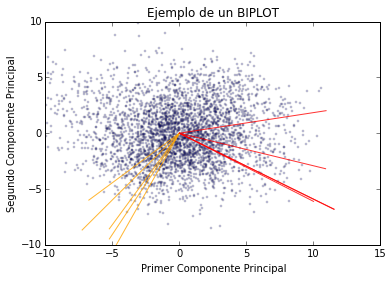

In [15]:
Loadings = pd.DataFrame(V[:,ind_sorted], index = data_psy.keys())
# Vamos a hacer un plot de las cargas de los primeros dos componentes principales
for v in range(V.shape[0]):
    if Loadings.iloc[v,0]>= np.percentile(Loadings[0],95):
        plt.plot([0,50*Loadings.iloc[v,0]],[0,50*Loadings.iloc[v,1]], color='r', alpha=0.8)
    elif Loadings.iloc[v,0]<= np.percentile(Loadings[0],5):
        plt.plot([0,50*Loadings.iloc[v,0]],[0,50*Loadings.iloc[v,1]], color='orange', alpha=0.8)
        
plt.scatter(Zmat[:,0],Zmat[:,1], s=3, color='b',alpha=0.2, edgecolor='k')      
plt.axis([-10,15,-10,10])
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Ejemplo de un BIPLOT')

In [18]:
# Miremos el primero a cuáles variables les da mayor y menor peso
print '---------------------------'
print Loadings[0][Loadings[0]>= np.percentile(Loadings[0],90)]
print '---------------------------'
print Loadings[0][Loadings[0]<= np.percentile(Loadings[0],10)]

---------------------------
CI                          0.230889
Tmn___Eficiencia_(Valor)    0.200336
Tmn___C.I_(Valor)           0.230910
ENFOQUE_EN_RESULTADOS       0.190635
PLANEACIoN                  0.199099
TOMA_DE_DECISIONES          0.188653
NEGOCIACIoN                 0.219058
COMUNICACIoN_EFECTIVA       0.187338
APRENDIZAJE                 0.218335
Name: 0, dtype: float64
---------------------------
Cle___(T)_Estabilidad         -0.145225
Cle___(T)_Apego_a_normas      -0.110280
Cle___(L)_Estabilidad         -0.135225
Cle___(L)_Apego_a_normas      -0.104568
Cle___(M)_Estabilidad         -0.104662
Cle___(M)_Apego_a_normas      -0.061365
Vps___Tradicion               -0.071098
Vps___Conformidad             -0.049533
SENSIBILIDAD_ORGANIZACIONAL   -0.033183
Name: 0, dtype: float64


# Interpretando el primer componente principal


* El primer componente principal asigna cargas altas a aquellas variables que están asociadas con la inteligencia más racional (coeficiente intelectual, etc.)


* Y cargas más bajas a los resultados de las [pruebas de Cleaver](https://prezi.com/7eys8gwxbks-/test-cleaver/) que miran el comportamiento individual cuando los individuos están en condiciones normales y bajo estrés.


* Pero viendo los coeficientes más bajos, encontramos que el primer componente principal parece estar asociado a la parte más racional.

# Correlación de los componentes principales con otras variables


* Otra forma de intepretar los componentes principales es mirando su relación con otras variables.


* Hagamos esto a continuación.

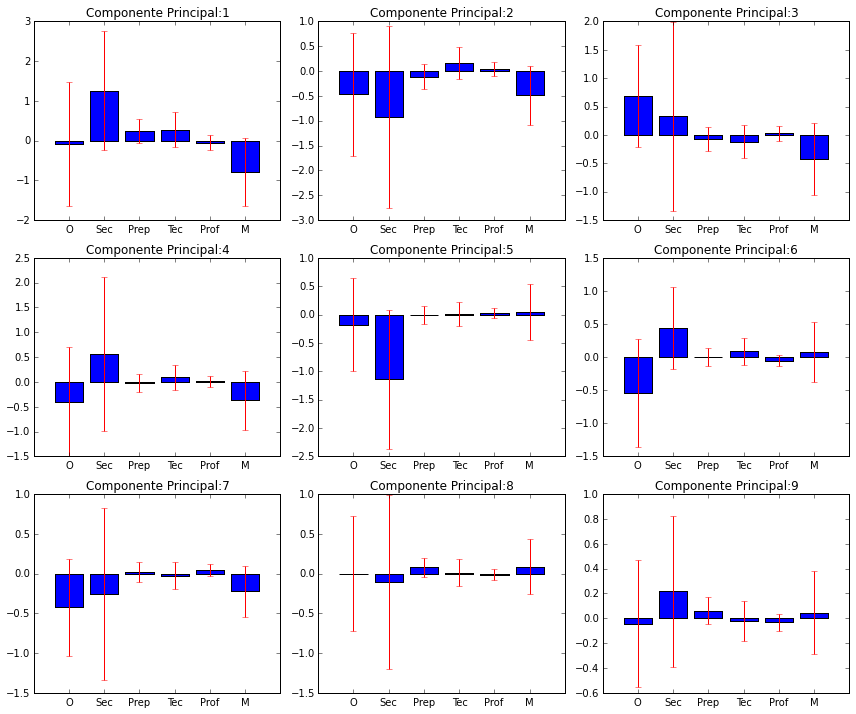

In [23]:
# Veamos si tienen alguna relación con el nivel educativo
# ordenemos los niveles escolares
niv_esc = [u'OTRO',u'SECUNDARIA',u'PREPARATORIA',u'TECNICA', u'PROFESIONAL',u'MAESTRIA']
niv_labs = ['O','Sec','Prep','Tec','Prof','M']
plt.figure(figsize=(12,10))
for p in range(9):
    plt.subplot(3,3,p+1)
    meanp = pd.DataFrame(Zmat[:,p]).groupby(data_dem.NIVEL_ESCOLAR).mean()
    meanp = meanp.ix[niv_esc].values
    semp  = pd.DataFrame(Zmat[:,p]).groupby(data_dem.NIVEL_ESCOLAR).sem()
    semp  = semp.ix[niv_esc].values
    plt.bar(np.arange(6), meanp, yerr=1.96*semp, ecolor='r', align='center')
    plt.xticks(np.arange(6),niv_labs)
    lab_tit = 'Componente Principal:' + str(p+1)
    plt.title(lab_tit)
plt.tight_layout()    

# Educación: no encontramos diferencias significativas 


* Por lo menos con los primeros nueve componentes principales.


* Con género, aunque las diferencias no son estadísticamente significativas, es interesante que los componentes principales si parecen separar por género.  (siguiente lámina)

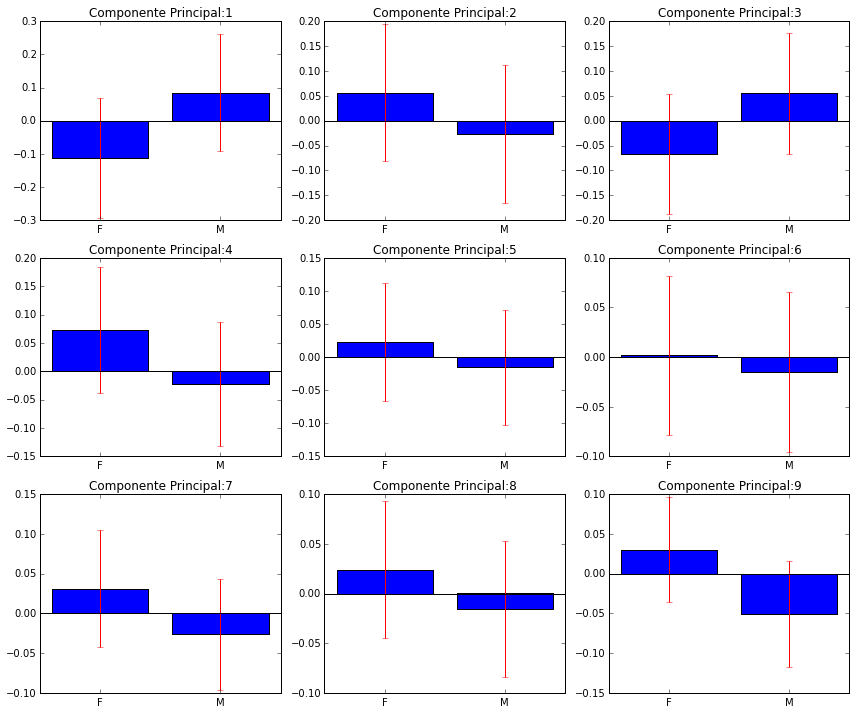

In [24]:
lab_gen = ['F','M']
# Repitamos por género
# Veamos si tienen alguna relación con el nivel educativo
# ordenemos los niveles escolares
plt.figure(figsize=(12,10))
for p in range(9):
    plt.subplot(3,3,p+1)
    meanp = pd.DataFrame(Zmat[:,p]).groupby(data_dem.SEXO).mean()
    meanp = meanp.ix[lab_gen].values.flatten()
    semp  = pd.DataFrame(Zmat[:,p]).groupby(data_dem.SEXO).sem()
    semp  = semp.ix[lab_gen].values.flatten()
    plt.bar(np.arange(2), meanp, yerr=1.96*semp, ecolor='r', align='center')
    plt.xticks(np.arange(2),lab_gen)
    lab_tit = 'Componente Principal:' + str(p+1)
    plt.title(lab_tit)
    ymin,ymax = plt.ylim()
    plt.axis([-0.5,1.5,ymin,ymax])
    plt.plot([-0.5,1.5],[0,0], color='k')
plt.tight_layout()    

In [25]:
# Veamos por curiosidad a qué variables le pone más y menos pesos el tercer componentes principal
print '---------------------------'
print Loadings[2][Loadings[2]>= np.percentile(Loadings[2],95)]
print '---------------------------'
print Loadings[2][Loadings[2]<= np.percentile(Loadings[2],5)]

---------------------------
Cle___(T)_Influencia    0.213773
Cle___(L)_Influencia    0.199572
Cle___(M)_Influencia    0.155688
PERSUASIVIDAD           0.140873
VENTAS                  0.105598
Name: 2, dtype: float64
---------------------------
INSIGHT_SERVICIO             -0.328751
INSIGHT_LIDERAZGO            -0.352178
INSIGHT_ENFOQUE_Resultados   -0.349508
INSIGHT_TRABAJO_Equipo       -0.311611
INSIGHT_CONTROL              -0.349349
Name: 2, dtype: float64


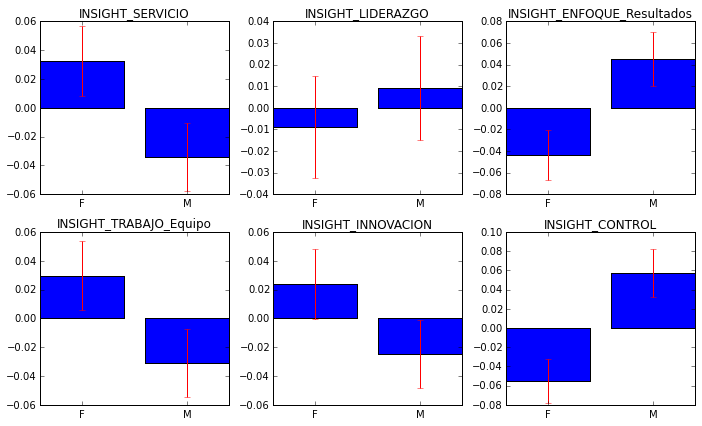

In [28]:
# veamos cómo están los hombres y las mujeres en insight
plt.figure(figsize=(10,6))
insight_ind = pd.Series(data_psy.keys()).str.contains('INSIGHT').values.flatten()
labs = np.asarray(data_psy.keys())[insight_ind]
for k in range(int(np.sum(insight_ind))):
    meank = xmat_dem.iloc[:,insight_ind].iloc[:,k].groupby(data_dem.SEXO).mean()
    semk  = xmat_dem.iloc[:,insight_ind].iloc[:,k].groupby(data_dem.SEXO).sem().values.flatten()
    labsk = np.asarray(meank.index)
    meank = meank.values.flatten()
    plt.subplot(2,3,k+1)
    plt.bar(np.arange(2),meank, yerr=semk, ecolor='r',align='center')
    plt.title(labs[k])
    plt.xticks(np.arange(2), labsk)
plt.tight_layout()

In [29]:
import olsdan as ols

# Miremos si tienen alguna relación con la antigüedad.
# Pero usemos un scatterplot smoother
def spline_smoother(y,x,K):
    '''
    Cubic-spline smoother.
    y: variable dendiente
    x: variable independiente
    K: número de nodos para hacer 
    '''
    N = y.shape[0]
    y = y.reshape((N,1))
    x = x.reshape((N,1))
    # grid
    nod_grid = np.percentile(x, np.linspace(10, 90, K))
    # matriz con partes positivas
    xpos_mat = np.zeros((N,K))
    for k in range(K):
        xpos_mat[:,k] = ((x>nod_grid[k])*(x-nod_grid[k])**3).flatten()

    # Estamos listos para concatenar
    xmat = np.concatenate((np.ones((N,1)),x, np.power(x,2), np.power(x,3),
                           xpos_mat), axis=1)
    # estimamos
    olsx = ols.ols_dan(y,xmat)
    # lo único que necesitamos es el yest
    yest = np.asarray(olsx.yest()).reshape((olsx.nobs,1))
    xest = np.asarray(olsx.xmat[:,1]).reshape((olsx.nobs,1))
    # dejémoslo listo para que salgan ordenados de menor a mayor (los X)
    df = pd.DataFrame(np.concatenate((yest,xest),axis=1), columns=['yest','xest']).sort(columns=['xest'])
    return df.yest, df.xest

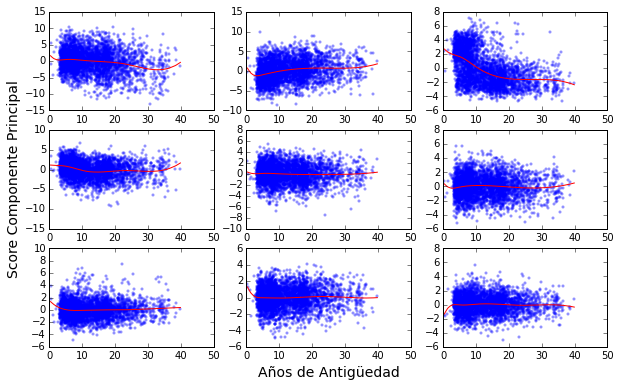

In [31]:
nobs = data_dem.shape[0]
plt.figure(figsize=(10,6))
for v in range(9):
    plt.subplot(3,3,v+1)
    plt.scatter(data_dem.Antiguedad, Zmat[:,v], s=5, color='b', alpha=0.3)
    # Usemos un scatterplot smoother para tratar de visualizar alguna relación
    yv,xv = spline_smoother(Zmat[:,v].reshape((nobs,1)),
                            np.asarray(data_dem.Antiguedad).reshape((nobs,1)),3)
    plt.plot(xv,yv, color='r')
    # optimicemos el espacio
    ymin, ymax = plt.ylim()
    plt.axis([0,50,ymin,ymax])
    fig_tit = 'Componente Principal ' + str(v+1) + u' y Antigüedad'
    if v==3:
        plt.ylabel('Score Componente Principal',fontsize=14)
    if v==7:
        plt.xlabel(u'Años de Antigüedad',fontsize=14)

# Psicométricos y Ventas:


* Finalmente, veamos si los componentes principales están correlacionados con qué tanto venden los empleados.


* En la siguiente lámina vamos a calcular la matriz de correlaciones y vamos a graficarla con un *heatmap*.

<matplotlib.colorbar.Colorbar instance at 0x10bdec9e0>

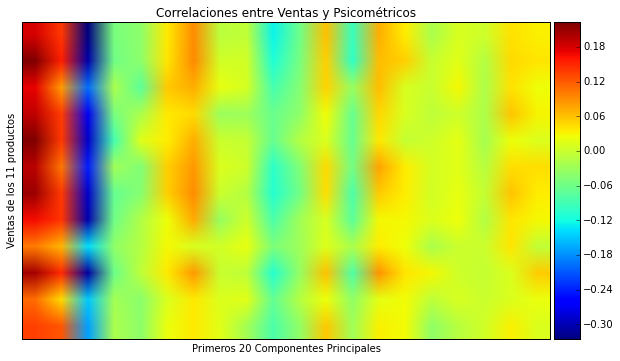

In [70]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Obtengamos una matriz de correlaciones
nvar_v = data_ven.shape[1]
CorrMat = np.zeros((nvar_v,20))
CorrMat[:,:]= np.nan
for i in range(nvar_v):
    for j in range(20):
        predata = np.concatenate((data_ven.iloc[:,i].values.reshape((nobs,1)),
                                  Zmat[:,j].reshape((nobs,1))), axis=1)
        predata = pd.DataFrame(predata).dropna()
        CorrMat[i,j] = np.corrcoef(predata.iloc[:,0], predata.iloc[:,1])[0,1]
# hagamos un heatmap
plt.figure(figsize=(10,6))
ax = plt.gca()
im = plt.imshow(CorrMat)
plt.xticks([])
plt.xlabel('Primeros 20 Componentes Principales')
plt.yticks([])
plt.ylabel('Ventas de los 11 productos')
plt.title(u'Correlaciones entre Ventas y Psicométricos')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

# En conclusión:


* La interpretación de los componentes principales requiere un conocimiento completo de las variables que se están utilizando.


* Cuando hay muchas variables en la matrix $X$ requiere de mucho tiempo.


* Una alternativa a analizar los coeficientes de la matriz de cargas, es buscar correlaciones de los componentes principales con variables que sepamos que son relevantes.


# Métodos de Clustering:


* Los métodos más utilizados en segmentación son métodos de clustering.


* El objetivo es encontrar subgrupos o segmentos que sean relativamente homogéneos a dentro, pero heterogéneos entre sí.


* Vamos a ver dos de los más utilizados: K-means y Jerárquico.


* Otros métodos con un mayor fundamento estadístico también son ampliamente utilizados (ej. mezclas de normales, pero están por fuera del alcance de este curso).




# K-means


* Para empezar vamos a fijar el número de clústers que deseamos encontrar: $K$.


* Los clusters son una partición de nuestra muestra de entrenamiento: 

$$
C_1 \cup C_2 \cup \cdots \cup C_K = \{1,2,\cdots, N\} \\
C_j \cap C_k = \emptyset
$$

donde cada $C_i$ son los subconjuntos de índices de la muestra interpretados como 

$$
C_k = \{i \in \{1,2,\cdots, N\}: \text{$i$ pertenece al grupo $k$}\}
$$

* El objetivo es encontrar los clusters $C_1, \cdots, C_K$ que minimizan la variación interna de los clústers (within-cluster variation):
$$
min_{C_1, \cdots, C_K} \sum_{k=1}^K W(C_k)
$$


donde $W(C_k)$ es una medida de distancia entre observaciones dentro del clúster $k$.


* Es común utilizar la distancia *euclidiana*:

$$
W(C_k) = \frac{1}{|C_k|} \sum_{i \neq i' \in C_k} \sum_{j=1}^P (x_{ij}-x_{i'j})^2 
$$


* Pero cualquier otra métrica se puede utilizar.

# Pseudocódigo del algoritmo de K-means


El algoritmo de K-means es muy fácil:


1. Los clústers originales se asignan de manera aleatoria.

2. Repetir hasta converger (no haya asignaciones a clústers distintos):

    * Para cada clúster $k$, calcular el **centroide**:
    
    $$
    cent_k = (\bar{x}_{1k},\bar{x}_{2k}, \cdots, \bar{x}_{Pk})
    $$
    
    * Cada observación se asigna al clúster más cercano:
    $$
    k* \leftarrow i \iff d(x_i,cent_{k*}) < d(x_i,cent_{k})
    $$

# K-means con datos simulados

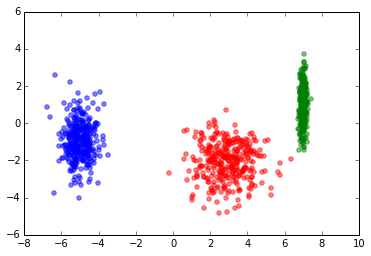

In [74]:
# simulemos datos con tres clústers
N0 = 1000
K0 = 3
np.random.seed
ind_g = np.dot(np.random.multinomial(1,[1.0/K0]*K0,size=N0), np.arange(3))
# Mezcla de normales
mu      = np.array([[3,-5,7],[-2,-1,1]])
sigma   = np.array([[1,0.5,0.1],[1,1,1]])
Xmat0    = np.zeros((N0,2))
for x in range(2):
    for g in range(K0):
        nobs = np.sum(ind_g==g)
        yrnd = mu[x,g] + sigma[x,g]*np.random.randn(nobs,1)
        # assign in Ymat
        Xmat0[ind_g==g,x] = yrnd.flatten()

# Plot a scatter with colors:
colmat = ['r','b','g']
for g in range(3):
    plt.scatter(Xmat0[ind_g==g,0],Xmat0[ind_g==g,1], color = colmat[g],alpha=0.5)


In [75]:
def kmeans(Xmat,K):
    '''
    Algoritmo de K-medias
    Xmat: matriz de variables
    K: número de clústers que el usuario define
    '''
    N, nvars = Xmat.shape
    # Asignación inicial es aleatoria
    rnd_ass = pd.Series(np.dot(np.random.multinomial(1,[1.0/K]*K,N),
                                       np.arange(K)))
    # Vamos a hacer un loop sobre la fracción que cambia
    frc_chg = 1
    ind = 1
    while frc_chg>0.0001:
        print('-------------------------')
        print(u'Iteracion: ',ind)
        print(u'Fraccion de Cambios: ',frc_chg)
        print('-------------------------')
        # Primer paso: cálculo del centroide
        means   = pd.DataFrame(Xmat).groupby(rnd_ass.values.flatten()).mean()
        #----------------------------------------    
        # 2. Distancia Euclidiana
        #----------------------------------------    
        DistMat = np.zeros((N,K))
        for g in range(K):
            DistMat[:,g] = ((Xmat-means.ix[g].values.reshape((1,nvars)))**2).sum(axis=1)
        # Minimicemos distancia:
        ind_g_new = pd.Series(np.argmin(DistMat,axis=1))
        # Cálculo de la fracción que cambió asignación
        frc_chg = np.mean(ind_g_new!=rnd_ass)
        # Actualicemos rnd_ass
        rnd_ass = ind_g_new
        #-----------------------------------------------------        
        #-----------------------------------------------------        
        # Puede que un grupo haya sido eliminado
        # Forcemos a incluirlo de manera aleatoria
        #-----------------------------------------------------        
        #-----------------------------------------------------        
        # Cuántos grupos tenemos
        inc_cnt = rnd_ass.groupby(rnd_ass).count()
        # Cuál fue eliminado
        mss_grp = np.setdiff1d(np.arange(K),np.asarray(inc_cnt.index))
        rnd_ass = pd.Series(rnd_ass)
        if mss_grp.shape[0]>0:
            # 5% asignado aleatoriamente dentro del grupo mayoritario
            ind_lg_grp = pd.Series(rnd_ass).loc[rnd_ass==inc_cnt.argmax()].index
            sze = int(0.05*inc_cnt.max())
            for gg in mss_grp:
                ind_choice = np.random.choice(ind_lg_grp,sze)
                rnd_ass.loc[ind_choice] = gg
        # update ind
        ind +=1
    # Listo:
    return rnd_ass

-------------------------
(u'Iteracion: ', 1)
(u'Fraccion de Cambios: ', 1)
-------------------------
-------------------------
(u'Iteracion: ', 2)
(u'Fraccion de Cambios: ', 0.65700000000000003)
-------------------------
-------------------------
(u'Iteracion: ', 3)
(u'Fraccion de Cambios: ', 0.20100000000000001)
-------------------------
-------------------------
(u'Iteracion: ', 4)
(u'Fraccion de Cambios: ', 0.035999999999999997)
-------------------------
-------------------------
(u'Iteracion: ', 5)
(u'Fraccion de Cambios: ', 0.002)
-------------------------


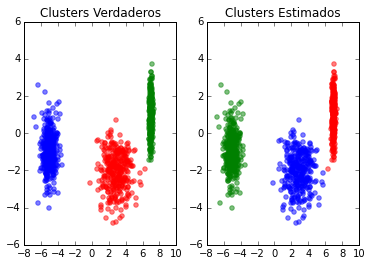

In [76]:
kest = kmeans(Xmat0,3)
plt.subplot(1,2,1)
colmat = ['r','b','g']
for g in range(3):
    plt.scatter(Xmat0[ind_g==g,0],Xmat0[ind_g==g,1], color = colmat[g],alpha=0.5)
plt.title('Clusters Verdaderos')
# Ahora los estimados
plt.subplot(1,2,2)
for g in range(3):
    plt.scatter(Xmat0[kest.values==g,0],Xmat0[kest.values==g,1], color = colmat[g],alpha=0.5)
plt.title('Clusters Estimados')

# Mínimos Locales

* El algoritmo de K-medias es fácil de programar y generalmente funciona bien.


* Pero tiene un problema: puede que el minimizador no sea global.


* Por esta razón es usual utilizar varias asignaciones iniciales aleatorias.


* La asignación final es la que minimiza la varianza *within-clusters*.

# De la muestra de entrenamiento a la muestra de prueba


* Una vez tenemos nuestra segmentación o nuestros clústers, ¿cómo podemos asignar individuos que no utilizamos en el cálculo de los mismos?


* Cada nuevo individuo se asigna al clúster más cercano.

# Kmeans in Scikit-Learn

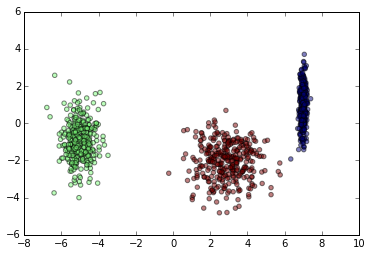

In [77]:
from sklearn.cluster import KMeans
km_scikit = KMeans(n_clusters=3, random_state=1524)
km_scikit.fit(Xmat0)
y_pred = km_scikit.predict(Xmat0)
plt.scatter(Xmat0[:, 0], Xmat0[:, 1], c=y_pred, alpha=0.5);

# ¿Cómo saber cuántos clústers incluir?


* Una decisión importante es decidir cuántos clústers incluir.


* Hay una literatura extensa que intenta responder esta pregunta.


* Una forma de responderla es volver a la pregunta inicial:

> **¿Para qué queremos los clústers o segmentos?**


* Queremos buscar clústers que tengan poder de diferenciación entre segmentos de acuerdo a nuestros observables.

# Volvamos a los datos de la fuerza de ventas

*  Vamos a calcular 12 clústers y graficaremos el promedio de cada componente principal


*  La idea es ver si los clústers son distintos, es decir, si los miembros de cada uno son distintos en por lo menos alguna dimensión (nuestros componentes principales)

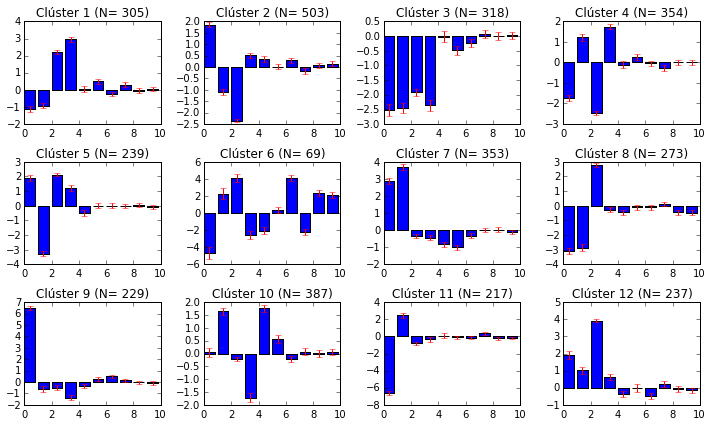

In [80]:
K = 12
clust_fv = KMeans(n_clusters=K, random_state=0)
clust_fv.fit(xmat_dem)
y_pred = clust_fv.predict(xmat_dem)

plt.figure(figsize=(10,6))
for p in range(K):
    plt.subplot(3,4,p+1)
    mean_z = pd.DataFrame(Zmat[:,:10]).loc[y_pred==p].mean().values
    nobs_z = (y_pred==p).sum()
    sem_z = pd.DataFrame(Zmat[:,:10]).loc[y_pred==p].sem().values
    plt.bar(np.arange(mean_z.shape[0]),mean_z, yerr=1.96*sem_z, ecolor='r')
    fig_tit = u'Clúster ' + str(p+1) + ' (N= ' + str(nobs_z) + ')'
    plt.title(fig_tit)
    #if p==4:
    #    plt.xlabel('Componentes Principales')
plt.tight_layout()

# Número de clústers

* Suponiendo que tenemos una interpretación clara de cada componente principal, podemos ver ciertos patrones sistemáticos:


* Por ejemplo, los 305 individuos del Clúster 1 se caracterian principalmente por tener scores medio alto en los CP 2 y 3.


* El clúster 9 son individuos con score alto en el CP 0.


* Podríamos continuar así.  


* Lo importante es que cada clúster nos de información que nos permita *separar* a los individuos de la muestra 

# Clústers Jerárquicos


* El algoritmo de K-means es fácil de utilizar, pero depende de que fijemos el número de clústers desde el principio.


* Alternativamente podemos utilizar un método bottom-up:


* Empezamos con tantos clústers como individuos $N$.


* En cada iteración agrupamos los dos clústers más cercanos.


* El proceso para cuando tengamos un sólo clúster.

# ¿Cómo identificamos los clústers más cercanos?


* Dados dos clústers $G,H$ hay varias métricas que podemos usar:


**Single Linkage**
$$
d_{SL}(G,H) = \text{min}_{i \in G, i' \in H} d_{i,i'}
$$


**Complete Linkage**
$$
d_{CL}(G,H) = \text{max}_{i \in G, i' \in H} d_{i,i'}
$$

**Group Average**
$$
d_{CL}(G,H) = \frac{1}{N_G N_H} \sum_{i \in G} \sum_{i' \in H} d_{i,i'}
$$


* Adicionalmente podemos utilizar la distancia al centroide, tal como lo hicimos en Kmeans.


* Una lista relativamente completa de funciones de distancia se puede encontrar en [la documentación de Scipy](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)

In [81]:
# Clústers jerárquicos con los datos simulados:
clust_init = np.arange(N0)
counter = 0
# Sólo paramos cuando tengamos un clúster
max_iter = N0-1
# Resultados
ResMat = pd.DataFrame(np.zeros((N0,4)), columns=['Cluster1','Cluster2','ClusterNuevo','Distancia'])
while pd.Series(clust_init).unique().shape>1 and counter<max_iter:
#while pd.Series(clust_init).unique().shape>1 and counter<3:
    # Tenemos que encontrar la distancia entre todos
    # Si N0 no es muy grande podemos utilizar broadcasting para generar matrices de tamaño NxN de distancia
    # Esto no se puede utilizar cuando N sea muy grande
    #------------------------------------------------------------
    # Primer paso, hacer una reducción de la matriz a los clústers
    #------------------------------------------------------------
    NewX = pd.DataFrame(Xmat0).groupby(clust_init).mean()
    #------------------------------------------------------------
    # Segundo paso: distancias
    #------------------------------------------------------------
    NC = NewX.shape[0]
    DistMat = pd.DataFrame(np.zeros((NC,NC)),index=NewX.index)
    for k in range(2):
        DistMat += (NewX.iloc[:,k].reshape((NC,1)) - NewX.iloc[:,k].reshape((1,NC)))**2
    DistMat[DistMat==0] = np.nan
    #print pd.Series(clust_init).unique().shape, NewX.shape, DistMat.shape[0]
    # Listos para minimizar
    minD = np.nanmin(DistMat)
    imin = np.array(NewX.index)[np.nanmin(DistMat,axis=1)==minD]
    # Vamos a agrupar a estos dos
    clust_init[np.in1d(clust_init,imin)] = N0 + counter
    # Guardemos los resultados
    ResMat.ix[counter] = [imin[0],imin[1],N0+counter,np.sqrt(minD)]

    counter +=1

ResMat.head(5)

,Cluster1,Cluster2,ClusterNuevo,Distancia
0,450,489,1000,0.002196
1,284,882,1001,0.003714
2,681,865,1002,0.004593
3,12,128,1003,0.006160
4,158,328,1004,0.006754


# Ahora con Scikit-learn: Graficando los clústers


* Ya entendemos bien cómo funciona el algoritmo.


* Veamos cómo se pueden visualizar utilizando la función de dendrogramas de scikit-learn


* Vamos a utilizar el método de **Ward**, que minimiza la varianza dentro de los clústers.


* Esto fue justo lo que hicimos en Kmeans y en el clúster jerárquico anterior.

In [82]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(Xmat0) #define the linkage_matrix using ward clustering pre-computed distances
linkdf = pd.DataFrame(linkage_matrix, columns=['Clust_Index1','Clust_Index2','Distance','Obs_New_Cluster'])
linkdf.head()

,Clust_Index1,Clust_Index2,Distance,Obs_New_Cluster
0,450,489,0.002196,2
1,284,882,0.003714,2
2,681,865,0.004593,2
3,12,128,0.006160,2
4,158,328,0.006754,2


# Scikit-Learn  y nuestro algoritmo

* Podemos ver que la matriz que tiene los links sucesivos (linkage matrix) es exactamente igual a la que construimos con nuestro algoritmo.


* Adicionalmente incluye una última columna que dice cuántas observaciones agrupó el nuevo clúster.


* Estamos listos para graficar los clústers.

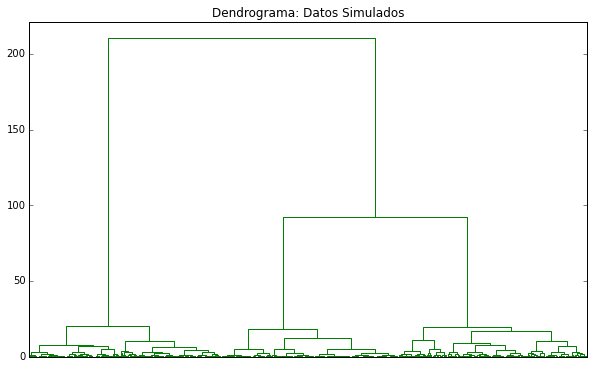

In [85]:
fig, ax = plt.subplots(figsize=(10, 6)) # set size
ax = dendrogram(linkage_matrix, orientation="top", p=N0, truncate_mode='lastp',
               color_threshold=N0)
plt.xticks([])
plt.title('Dendrograma: Datos Simulados')


# Interpretando un dendrograma


* El dendrograma nos muestra cómo se fueron agrupando los distintos clústers.


* En la parte inferior están los clústers de la iteración inicial: cada obsevación (fila) en nuestros datos es un clúster.


* Lentamente se van agrupando, y es justo lo que vemos si seguimos leyendo hacia arriba.


* Las distancias verticales entre ramas muestra la distancia entre los clústers.


* Si fijamos una línea horizontal, tenemos el número de clústers para esa distancia.

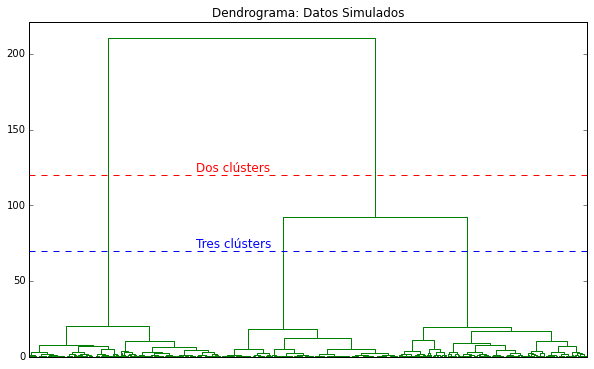

In [89]:
fig, ax = plt.subplots(figsize=(10, 6)) # set size
ax = dendrogram(linkage_matrix, orientation="top", p=N0, truncate_mode='lastp',
               color_threshold=N0)
xmin, xmax = plt.xlim()
# dos clústers
plt.plot([xmin,xmax],[120,120], ls='--',color='r')
plt.text(0.3*(xmin+xmax), 120, u'Dos clústers', fontsize=12, color='r', verticalalignment='bottom')
# tres clústers
plt.plot([xmin,xmax],[70,70], ls='--',color='b')
plt.text(0.3*(xmin+xmax), 70, u'Tres clústers', fontsize=12, color='b', verticalalignment='bottom')
plt.xticks([])
plt.title('Dendrograma: Datos Simulados')


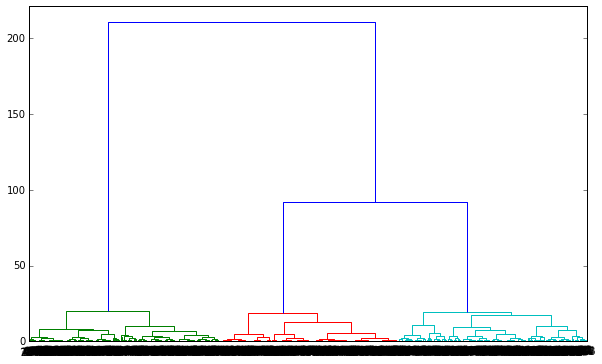

In [91]:
# Alternativamente podemos utilizar el color_threshold
fig, ax = plt.subplots(figsize=(10, 6)) # set size
ax = dendrogram(linkage_matrix, orientation="top", p=N0, truncate_mode='lastp',
               color_threshold=80)

# Hagamos zoom in


* Supongamos que queremos ver únicamente los primeros cuatro clústers


* Lo podemos customizar jugando con los argumentos *p* y *truncate_mode*


* La gráfica de abajo muestra que el primer clúster (de izquierda a derecha) agrupa tiene 359 elementos.

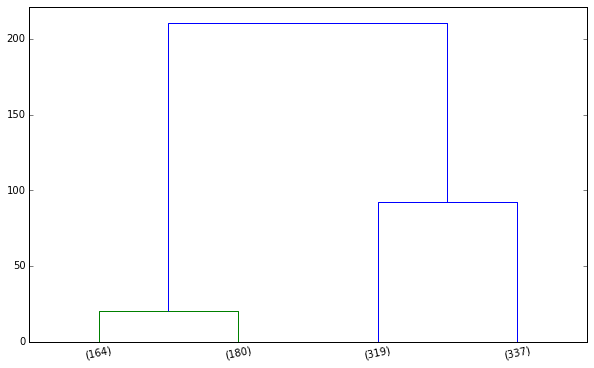

In [93]:
fig, ax = plt.subplots(figsize=(10, 6)) # set size
ax = dendrogram(linkage_matrix, orientation="top", p=4, truncate_mode='lastp',
               color_threshold=80)

# Veamos si podemos recuperar los clústers originales


* Ya sabemos cómo se encuentran los clústers.


* Necesitamos recuperar sus miembros a partir de la matriz de vínculos (linkage matrix).


* Es una buena excusa para mirar por primera vez **funciones recursivas** en Python.


* Una función recursiva es aquella que se llama a sí misma.


* Veamos un par de ejemplos.


* Sabemos que el *factorial de un entero positivo* es 

$$
n! = n(n-1)\cdots 1 \\
= n (n-1)!
$$

In [95]:
def factorial(n):
    '''
    Cálculo del factorial de un entero n por medio de una función recursiva
    '''
    if n == 1:
        # tenemos que darle la opción del final para que no se quede iterando o genere un error
        return 1
    else:
        return n*factorial(n-1)
    

print factorial(1), factorial(5), 5*factorial(4)

1 120 120


# La función *ward()* devuelve una matriz de vínculos que minimizan la varianza dentro de los clústers.


* Cada fila de la matriz nos dice cuáles clústers (primeras dos filas) se agregaron en uno nuevo, y la distancia entre los dos.


* En la lámina siguiente se puede ver que:


$$
C_{1998} = C_{1996} \cup C_{1997} \\
C_{1997} = C_{1994} \cup C_{1995} \\
$$

* Así que necesitamos recuperar a todos los miembros de estos tres clústers.


* Para esto vamos a utilizar una función recursiva.

In [98]:
linkdf['New_Cluster'] = linkdf.index + linkdf.index.max()+2
linkdf.sort(columns='Distance',ascending=False).head(10)

,Clust_Index1,Clust_Index2,Distance,Obs_New_Cluster,New_Cluster
998,1996,1997,210.597266,1000,1998
997,1994,1995,92.060409,656,1997
996,1987,1989,20.250324,344,1996
995,1991,1993,19.371552,337,1995
994,1980,1992,18.497503,319,1994
993,1988,1990,17.353868,250,1993
992,1978,1982,12.540771,229,1992
991,1975,1981,10.912810,87,1991
990,1973,1984,10.399711,106,1990
989,1974,1983,10.192442,180,1989


In [99]:
def find_parent(linkdf,child):
    '''
    Para cada nodo, recupera toda la secuencia de padres (recorre el dendrograma de abajo hacia arriba).
    -----------------------
    linkdf: linkage matrix con la misma estructura de la lámina anterior.
    child: clúster hijo.
    '''
    # Queremos ir anexando los padres recursivamente, así que utilicemos una lista
    x = [child]
    # Si llegamos al final, devuelva el nodo final (en funciones recursivas siempre es necesario esto)
    if child>=linkdf.New_Cluster.max():
        return [linkdf.New_Cluster.max()]
    else:
        # Alternativamente: dado el nodo actual (child), necesitamos encontrar la fila en linkdf donde se agregó a 
        # otro nodo o clúster
        ind_par = np.logical_or(np.in1d(linkdf[['Clust_Index1']],np.array([child])),
                 np.in1d(linkdf[['Clust_Index2']],np.array([child])))
        # ASí identificamos al padre
        par = linkdf.New_Cluster.ix[linkdf.loc[ind_par].index[0]]
        # Ahora vamos a llamar al padre del padre del...
        x.extend(find_parent(linkdf,par))
        return x

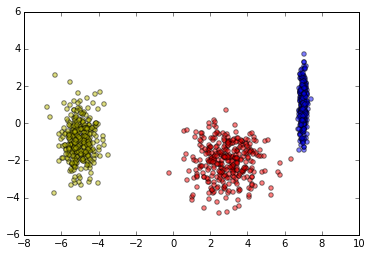

In [102]:
# Utilicemos nuestra función recursiva para encontrar todos aquellos indiviudos que hacen parte de los tres clústers superiores
ultimos_tres = [1995,1994,1996]
colmat = ['r','b','y']
for s in range(3):
    # primero necesitamos todos los índices que terminan en cada uno de los nodos finales
    nodos = []
    for i in range(N0):
        if np.in1d(ultimos_tres[s], np.array(find_parent(linkdf,i)))==True:
            nodos.extend([i])
    # ya podemos graficar 
    nodos1 = np.array(nodos).flatten()
    plt.scatter(Xmat0[nodos1, 0], Xmat0[nodos1, 1], c=colmat[s], alpha=0.5);
    

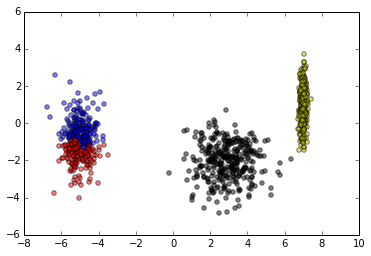

In [105]:
# Qué pasaría si utilizamos los primeros cuatro clústers?
ultimos_tres = [1987,1989,1994,1995]
colmat = ['r','b','y','k']
all_nodes = np.arange(N0)
for s in range(4):
    # Para optimizar el código, podemos ir excluyendo los que ya se encontraron
    if s>0:
        all_nodes = np.setdiff1d(all_nodes, np.array(nodos))
    nodos = []
    for i in all_nodes:
        if np.in1d(ultimos_tres[s], np.array(find_parent(linkdf,i)))==True:
            nodos.extend([i])
    # ya podemos graficar 
    nodos1 = np.array(nodos).flatten()
    plt.scatter(Xmat0[nodos1, 0], Xmat0[nodos1, 1], c=colmat[s], alpha=0.5)